<a href="https://colab.research.google.com/github/mohammedfaizan3103/ML-pracitice/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Week - 3

## Dataset - 1 Titanic

## Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Shape:", df.shape)
print("Data Types: ")
df.dtypes

Shape: (891, 12)
Data Types: 


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Sex'].value_counts()
df['Sex'] = np.where(df.Sex == 'male', 1, 0)
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
ordinal_label = {k: i for i, k in enumerate(df['Embarked'].unique(), 0)}
df['Embarked'] = df['Embarked'].map(ordinal_label)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.drop(labels=['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## Constant Features

In [ ]:
constant_features = [
    features for features in df.columns if df[features].std() == 0
]
print(f"Number of constant features: {len(constant_features)}")

Number of constant features: 0


## Quasi Constant Features

In [ ]:
quasi_constant_features = []
for feature in df.columns:
    predominant = (df[feature].value_counts() / len(df)).sort_values(ascending=False).values[0]
    if predominant > 0.9:
        quasi_constant_features.append(feature)

print(f"Number of Quasi Constant Features: {len(quasi_constant_features)}")

Number of Quasi Constant Features: 0


## Duplicated Features

In [ ]:
duplicated_feat = []

for i in range(len(df.columns)):
    col_1 = df.columns[i]
    for col_2 in df.columns[i + 1:]:
        if df[col_1].equals(df[col_2]):
            duplicated_feat.append(col_2)

print("Duplicated features:", duplicated_feat)

Duplicated features: []


## Correlated Features

<Axes: >

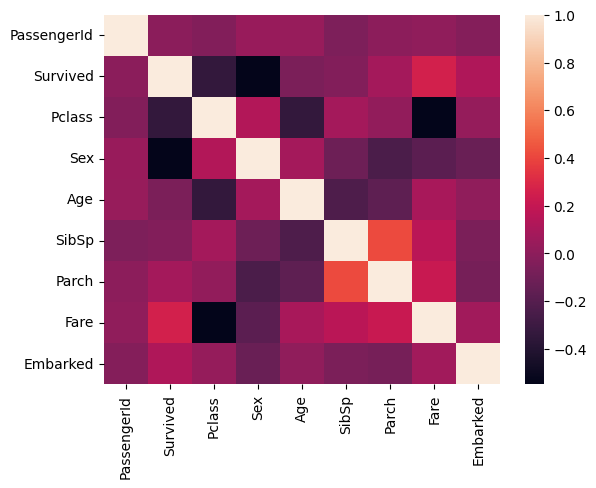

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i, j]) > threshold:
                colname = matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.9)
correlated = set(corr_features)
correlated

set()

In [ ]:
y = df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X = df.drop(labels='Survived', axis=1)
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0
887,888,1,0,19.0,0,0,30.0000,0
888,889,3,0,28.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


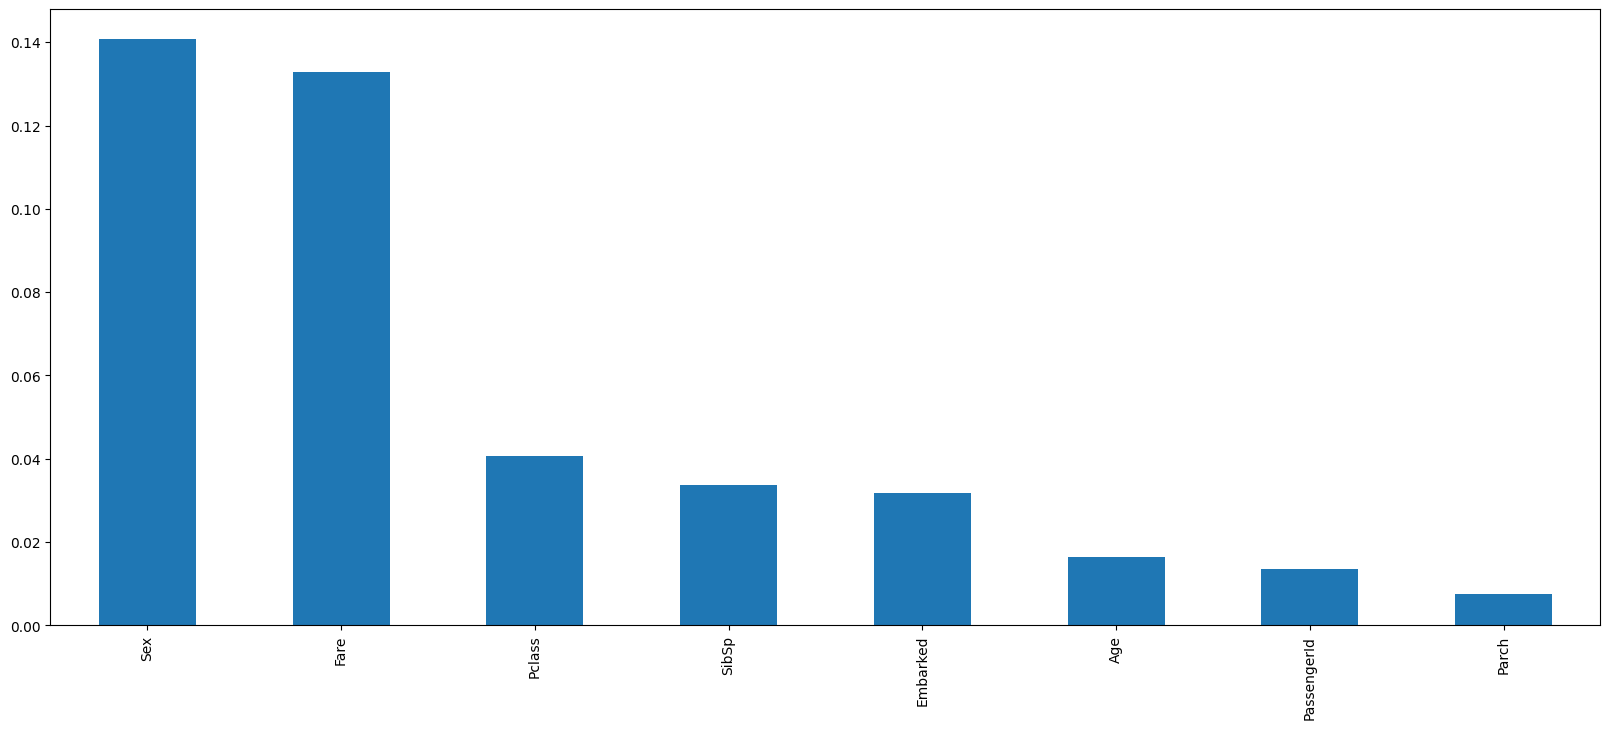

In [ ]:
from sklearn.feature_selection import mutual_info_classif


mi = mutual_info_classif(X.fillna(0), y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

In [ ]:
selected_features = mi[mi > 0.0001].index.tolist()
print(f"Number of Selected Features: {len(selected_features)}")
print(f"Selected Features: {(selected_features)}")

Number of Selected Features: 8
Selected Features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [ ]:
X = X[selected_features]
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0
887,888,1,0,19.0,0,0,30.0000,0
888,889,3,0,28.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


## Chi-2 Test

In [ ]:
from sklearn.feature_selection import chi2

f_score = chi2(X, y)
f_score

(array([3.31293407e+00, 3.08736994e+01, 9.27024470e+01, 2.16491630e+01,
        2.58186538e+00, 1.00974991e+01, 4.51831909e+03, 1.41242569e+01]),
 array([6.87366651e-02, 2.75378563e-08, 6.07783826e-22, 3.27352826e-06,
        1.08094210e-01, 1.48470676e-03, 0.00000000e+00, 1.71122816e-04]))

In [ ]:
p_values = pd.Series(f_score[1])
p_values.index = X.columns
p_values.sort_values(ascending = True)

,0
Fare,0.000000e+00
Sex,6.077838e-22
Pclass,2.753786e-08
Age,3.273528e-06
Embarked,1.711228e-04
Parch,1.484707e-03
PassengerId,6.873667e-02
SibSp,1.080942e-01


In [ ]:
p_values[p_values < 0.05].sort_values(ascending=True)

,0
Fare,0.000000e+00
Sex,6.077838e-22
Pclass,2.753786e-08
Age,3.273528e-06
Embarked,1.711228e-04
Parch,1.484707e-03


## Anova

In [ ]:
from sklearn.feature_selection import f_classif
f_score, p_value = f_classif(X, y)

print("F-scores:", f_score)
print("p-values:", p_value)


F-scores: [2.22848123e-02 1.15031272e+02 3.72405724e+02 3.76152805e+00
 1.11057220e+00 5.96346384e+00 6.30307642e+01 1.25588673e+01]
p-values: [8.81365777e-01 2.53704739e-25 1.40606613e-69 5.27606885e-02
 2.92243929e-01 1.47992454e-02 6.12018934e-15 4.14874835e-04]


Text(0.5, 1.0, 'Anova')

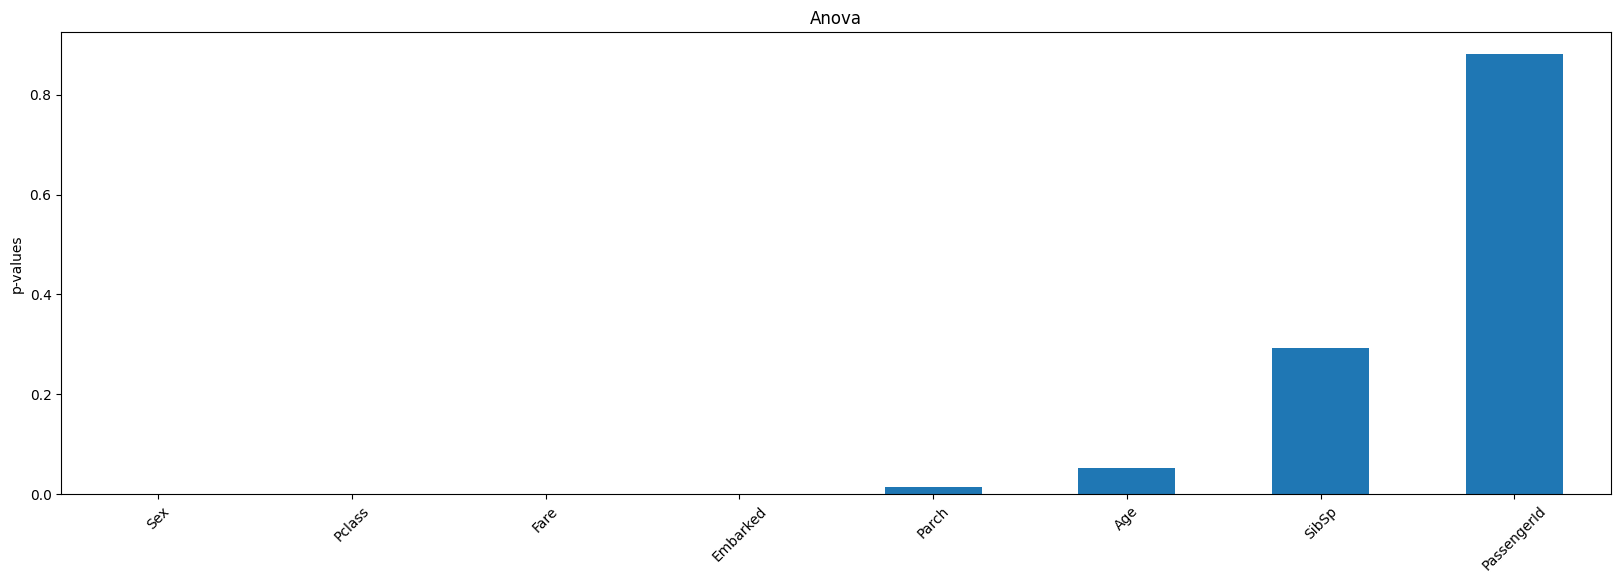

In [ ]:
p_values = pd.Series(p_value)
p_values.index = X.columns
p_values.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")

In [ ]:
p_values.sort_values(ascending=True)

,0
Sex,1.406066e-69
Pclass,2.537047e-25
Fare,6.120189e-15
Embarked,4.148748e-04
Parch,1.479925e-02
Age,5.276069e-02
SibSp,2.922439e-01
PassengerId,8.813658e-01


In [ ]:
p_values[p_values > 0.05]

,0
PassengerId,0.881366
Age,0.052761
SibSp,0.292244


### roc-auc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

roc_values = []
for feature in X.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X[feature].fillna(0).to_frame(), y)
    y_scored = clf.predict_proba(X[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y, y_scored[:, 1]))

roc_values = pd.Series(roc_values)
roc_values.index = X.columns
roc_values.sort_values(ascending=False)


,0
PassengerId,1.000000
Fare,0.896731
Sex,0.766873
Age,0.691441
Pclass,0.681417
SibSp,0.596539
Embarked,0.577935
Parch,0.577248


In [ ]:
roc_values[roc_values > 0.5]

,0
PassengerId,1.000000
Pclass,0.681417
Sex,0.766873
Age,0.691441
SibSp,0.596539
Parch,0.577248
Fare,0.896731
Embarked,0.577935


## Wrapper Methods

### Forward Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import  RandomForestClassifier
print(X.columns)
sfs1 = SFS(
    RandomForestClassifier(n_jobs=4),
    k_features=7,
    forward=True,
    floating=False,
    verbose=2,
    scoring='roc_auc',
    cv=3
)
sfs1 = sfs1.fit(np.array(X.fillna(0)), y)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.1s finished

[2025-08-29 03:48:23] Features: 1/7 -- score: 0.7668727830505224[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.9s finished

[2025-08-29 03:48:33] Features: 2/7 -- score: 0.8286917201930143[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.3s finished

[2025-08-29 03:48:42] Features: 3/7 -- score: 0.8443821301888601[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished

[2025-08-29 03:48:46] Features: 4/7 -- score: 0.838949605343048[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished

[2025-08-29 03:48:49] Features: 5/7 -- score: 0.8251765570574889[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished

[2025-08-29 03:48:53] Features: 6/7 -- score: 0.8452449429584892[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s finished

[2025-08-29 03:48:55] Features: 7/7 -- score: 0.8490077653149265

In [ ]:
selected_feature_names = [X.columns[i] for i in sfs1.k_feature_idx_]

# Print the best accuracy score, indices, and feature names
print('Best accuracy score: %.2f' % sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', selected_feature_names)

Best accuracy score: 0.85
Best subset (indices): (0, 1, 2, 3, 5, 6, 7)
Best subset (corresponding names): ['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import  RandomForestClassifier
print(X.columns)
sfs2 = SFS(
    RandomForestClassifier(n_jobs=4),
    k_features=7,
    forward=False,
    floating=False,
    verbose=3,
    scoring='accuracy',
    cv=3
)
sfs2 = sfs2.fit(np.array(X.fillna(0)), y)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.3s finished

[2025-08-29 03:49:05] Features: 7/7 -- score: 0.8148148148148149

In [ ]:
selected_feature_names = [X.columns[i] for i in sfs2.k_feature_idx_]

# Print the best accuracy score, indices, and feature names
print('Best accuracy score: %.2f' % sfs2.k_score_)
print('Best subset (indices):', sfs2.k_feature_idx_)
print('Best subset (corresponding names):', selected_feature_names)

Best accuracy score: 0.81
Best subset (indices): (0, 1, 2, 3, 4, 6, 7)
Best subset (corresponding names): ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']


Week 4

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/house_price_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.dtypes

,0
Id,int64
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
...,...
SaleCondition_AdjLand,bool
SaleCondition_Alloca,bool
SaleCondition_Family,bool
SaleCondition_Normal,bool


In [ ]:
bool_cols = df.select_dtypes(include=["bool", "uint8", "int8"]).columns
df[bool_cols] = df[bool_cols].fillna(0)

In [ ]:
print(df.isnull().sum())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64


In [ ]:
X = df[['YearBuilt']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

simple_linear = LinearRegression()
simple_linear.fit(X_train, y_train)

y_predict = simple_linear.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

print("Simple Linear Regression Evaluation:")
print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)


Simple Linear Regression Evaluation:
MSE : 5447834477.467489
MAE : 51148.46731516804
RMSE: 73809.44707466307


In [ ]:
print("Intercept (b0):", simple_linear.intercept_)
print("Slope (b1):", simple_linear.coef_[0])


Intercept (b0): -2382648.9153812435
Slope (b1): 1300.9310044469596


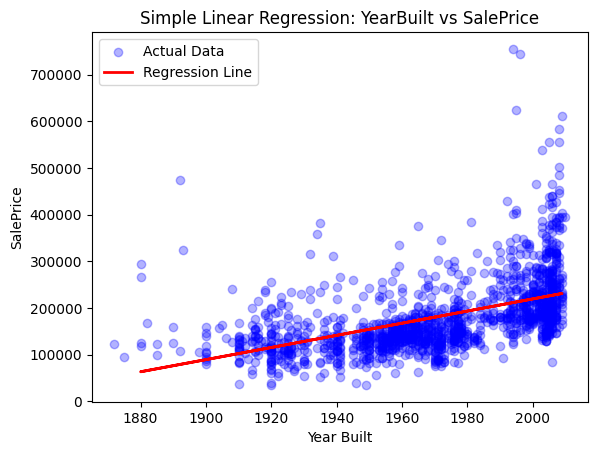

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')

plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.title('Simple Linear Regression: YearBuilt vs SalePrice')
plt.legend()
plt.show()


## Multi Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error

X = df.drop(["Id", "SalePrice"], axis=1)
y = df["SalePrice"]

bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred = multi_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("Multiple Linear Regression Results")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


Multiple Linear Regression Results
MSE: 2426338373.9937477
RMSE: 49257.87626353523
MAE: 20485.454124392403


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Intercept (b0):", multi_model.intercept_)
count = 0;
for feature, coef in zip(X.columns, multi_model.coef_):
    print(f"Slope for {feature}: {coef}")
    count += 1
    if(count == 20):
        break




Intercept (b0): -584048.4418402527
Slope for MSSubClass: 26.127118520298414
Slope for LotFrontage: 4.844641009614
Slope for LotArea: 0.6654864522158448
Slope for OverallQual: 6385.81314588508
Slope for OverallCond: 5928.744392963631
Slope for YearBuilt: 353.4714508982954
Slope for YearRemodAdd: 121.5858485447531
Slope for MasVnrArea: 22.113226004091615
Slope for BsmtFinSF1: 16.69419147370178
Slope for BsmtFinSF2: 9.156220050606976
Slope for BsmtUnfSF: -0.662498384690025
Slope for TotalBsmtSF: 25.187301626044245
Slope for 1stFlrSF: 15.148545908035771
Slope for 2ndFlrSF: 32.78424049295654
Slope for LowQualFinSF: -24.913480642851027
Slope for GrLivArea: 23.019548373335965
Slope for BsmtFullBath: 1913.322898202292
Slope for BsmtHalfBath: -2824.686112510665
Slope for FullBath: 2815.846551875623
Slope for HalfBath: 1741.0070377918173


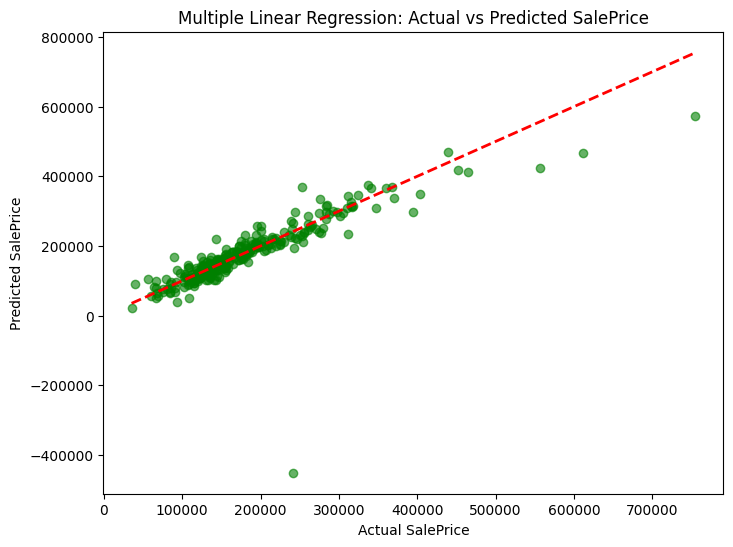

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Multiple Linear Regression: Actual vs Predicted SalePrice")
plt.show()

Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Stochastic Gradiend Descent
sgd = SGDRegressor(max_iter=5000, learning_rate="adaptive", eta0=0.0001)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:

mse_sgd = mean_squared_error(y_test, y_pred)
rmse_sgd = mse_sgd**0.5
mae_sgd = mean_absolute_error(y_test, y_pred)

print("Multiple Linear Regression Results With Gradient Descent")
print("MSE:", mse_sgd)
print("RMSE:", rmse_sgd)
print("MAE:", mae_sgd)

Multiple Linear Regression Results With Gradient Descent
MSE: 1134632593.071619
RMSE: 33684.30781642424
MAE: 19936.921961689004


In [ ]:
# Approximate Gradient Descent
sgd = SGDRegressor(max_iter=5000, average=True, learning_rate="adaptive", eta0=0.0001)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

mse_agd = mean_squared_error(y_test, y_pred)
rmse_agd = mse_agd**0.5
mae_agd = mean_absolute_error(y_test, y_pred)

print("Multiple Linear Regression Results With Gradient Descent")
print("MSE:", mse_agd)
print("RMSE:", rmse_agd)
print("MAE:", mae_agd)

Multiple Linear Regression Results With Gradient Descent
MSE: 1102707951.2559376
RMSE: 33207.04671084042
MAE: 19999.05293671769


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
print("comparision")
print("MSE")
print(f"No GD: {mse} SGD: {mse_sgd} AGD: {mse_agd}")
print("RMSE")
print(f"No GD: {rmse} SGD: {rmse_sgd} AGD: {rmse_agd}")
print("MAE")
print(f"No GD: {mae} SGD: {mae_sgd} AGD: {mae_agd}")

comparision
MSE
No GD: 2426338373.9937477 SGD: 1134632593.071619 AGD: 1102707951.2559376
RMSE
No GD: 49257.87626353523 SGD: 33684.30781642424 AGD: 33207.04671084042
MAE
No GD: 20485.454124392403 SGD: 19936.921961689004 AGD: 19999.05293671769


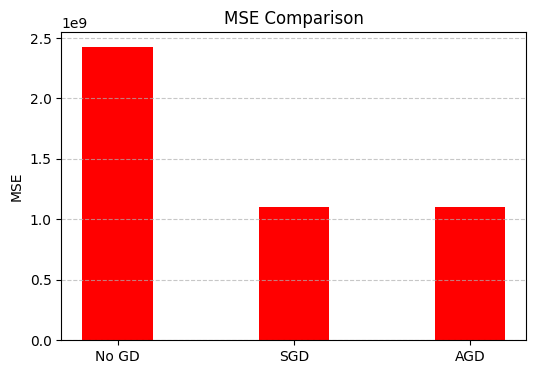

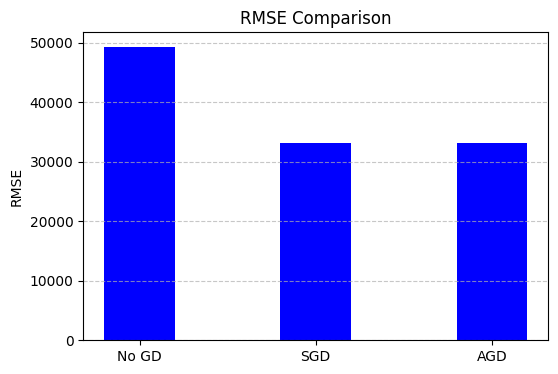

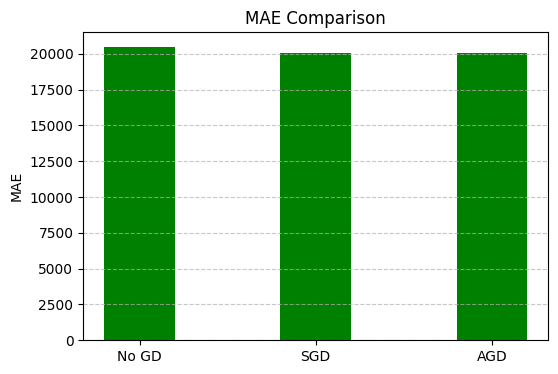

In [ ]:
methods = ["No GD", "SGD", "AGD"]
mse_values = [mse, mse_sgd,mse_agd]
rmse_values = [rmse, rmse_sgd, rmse_agd]
mae_values = [mse, mae_sgd, mae_agd]

import numpy as np
import matplotlib.pyplot as plt

# Methods and errors
methods = ["No GD", "SGD", "AGD"]
mse_values = [2.426338373e9, 1.102707025e9, 1.100788706e9]
rmse_values = [49257.88, 33207.03, 33178.14]
mae_values = [20485.45, 20068.65, 20041.16]

x = np.arange(len(methods))
width = 0.4

# MSE Bar Chart
plt.figure(figsize=(6,4))
plt.bar(x, mse_values, width, color='red')
plt.xticks(x, methods)
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# RMSE Bar Chart
plt.figure(figsize=(6,4))
plt.bar(x, rmse_values, width, color='blue')
plt.xticks(x, methods)
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# MAE Bar Chart
plt.figure(figsize=(6,4))
plt.bar(x, mae_values, width, color='green')
plt.xticks(x, methods)
plt.ylabel("MAE")
plt.title("MAE Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Lasso and Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

Ridge MSE: 15813805861.995396
Lasso MSE: 6316249122.5816765


## Polynomial Linear regression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/position_salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = df[['Level']].values
y = df['Salary'].values

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_predict = poly_reg.predict(poly.transform(X))

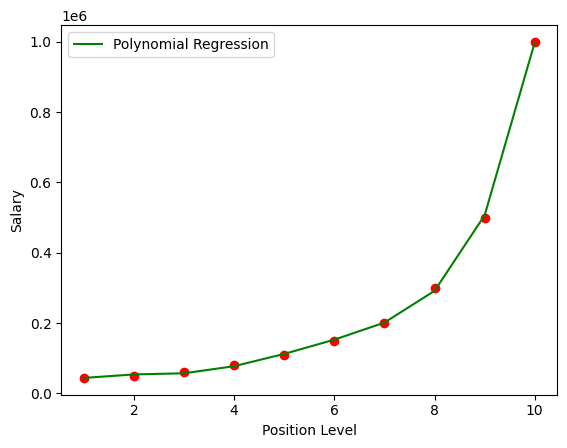

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X, y_predict, color='green', label="Polynomial Regression")

plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)   # fit + transform on training
X_test_poly  = poly.transform(X_test)        # only transform on test

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_predict = poly_reg.predict(X_test_poly)

/tmp/ipython-input-2996173685.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1,1)


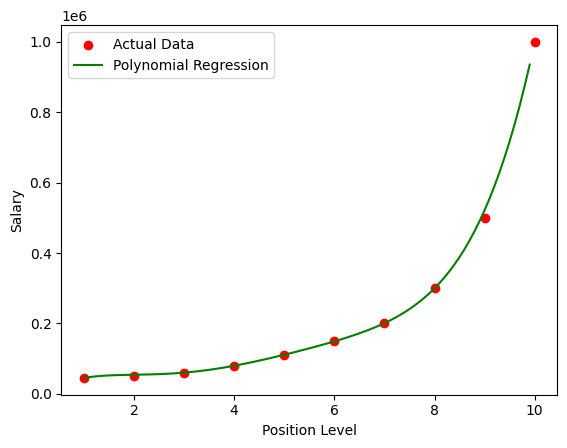

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1,1)
X_grid_poly = poly.transform(X_grid)

y_grid_pred = poly_reg.predict(X_grid_poly)

plt.scatter(X, y, color='red', label="Actual Data")
plt.plot(X_grid, y_grid_pred, color='green', label="Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Logistic Regression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y

)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
def logit2prob(model, X):
    log_odds = np.dot(X, model.coef_.T) + model.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability

print(logit2prob(model, X)[:20])


[[0.73446787]
 [0.04837749]
 [0.78014717]
 [0.04222434]
 [0.86582466]
 [0.1403433 ]
 [0.06482351]
 [0.59485346]
 [0.766863  ]
 [0.03349014]
 [0.22381741]
 [0.89357916]
 [0.72603568]
 [0.65515956]
 [0.63228457]
 [0.32960147]
 [0.41129061]
 [0.18350798]
 [0.37425043]
 [0.24090885]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[82 18]
 [26 28]]


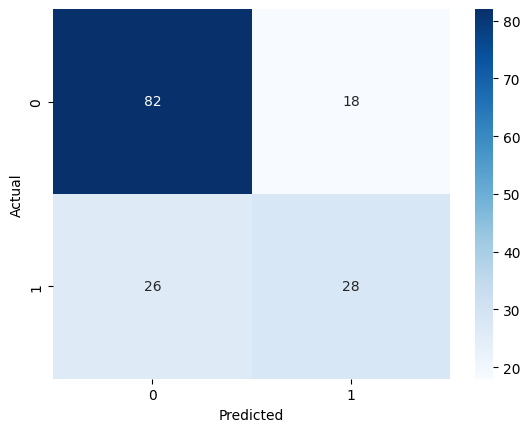

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall (Sensitivity): 0.5185185185185185
F1 Score: 0.56


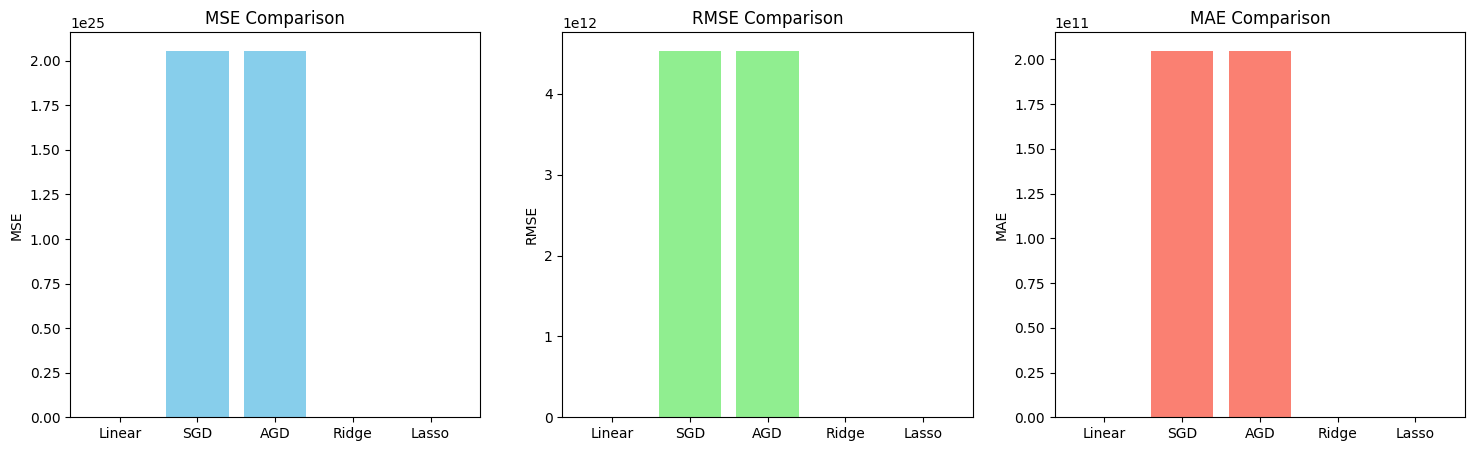

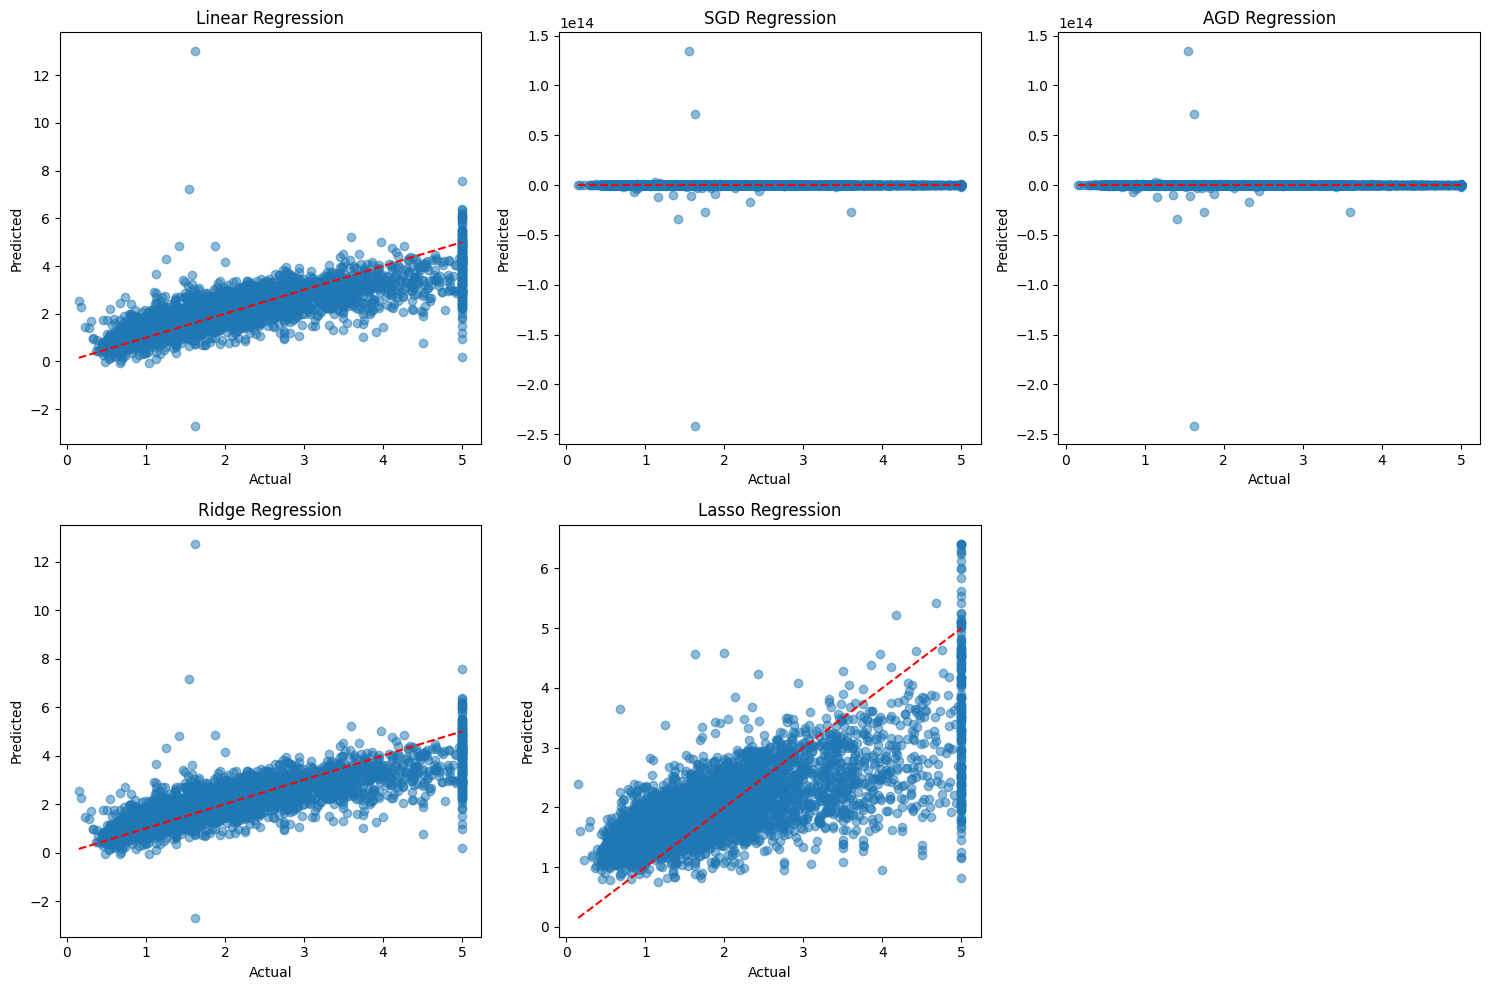

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_lr = lr.predict(X_test_poly)
mse_lr = mean_squared_error(y_test, y_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_lr)

sgd = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='invscaling', random_state=42)
sgd.fit(X_train_poly, y_train)
y_sgd = sgd.predict(X_test_poly)
mse_sgd = mean_squared_error(y_test, y_sgd)
rmse_sgd = np.sqrt(mse_sgd)
mae_sgd = mean_absolute_error(y_test, y_sgd)

sgd_m = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='invscaling', random_state=42)
sgd_m.fit(X_train_poly, y_train)
y_agd = sgd_m.predict(X_test_poly)
mse_agd = mean_squared_error(y_test, y_agd)
rmse_agd = np.sqrt(mse_agd)
mae_agd = mean_absolute_error(y_test, y_agd)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_ridge = ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_ridge)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)
y_lasso = lasso.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_lasso)

models = ['Linear', 'SGD', 'AGD', 'Ridge', 'Lasso']
mse_values = [mse_lr, mse_sgd, mse_agd, mse_ridge, mse_lasso]
rmse_values = [rmse_lr, rmse_sgd, rmse_agd, rmse_ridge, rmse_lasso]
mae_values = [mae_lr, mae_sgd, mae_agd, mae_ridge, mae_lasso]

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.bar(models, mse_values, color='skyblue')
plt.title('MSE Comparison')
plt.ylabel('MSE')

plt.subplot(1,3,2)
plt.bar(models, rmse_values, color='lightgreen')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1,3,3)
plt.bar(models, mae_values, color='salmon')
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.show()

plt.figure(figsize=(15,10))

for i, (y_pred, name) in enumerate(zip([y_lr, y_sgd, y_agd, y_ridge, y_lasso], models)):
    plt.subplot(2,3,i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} Regression')

plt.tight_layout()
plt.show()


## Week 6 DT, NB, SVC, KNN

### Decision Tree

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [60]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [61]:
df.shape

(768, 9)

In [62]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred))
print("Precision Score:", precision_score(y_test, pred))
print("Recall Score:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

Accuracy Score: 0.7662337662337663
Precision Score: 0.6610169491525424
Recall Score: 0.7090909090909091
F1 Score: 0.6842105263157895


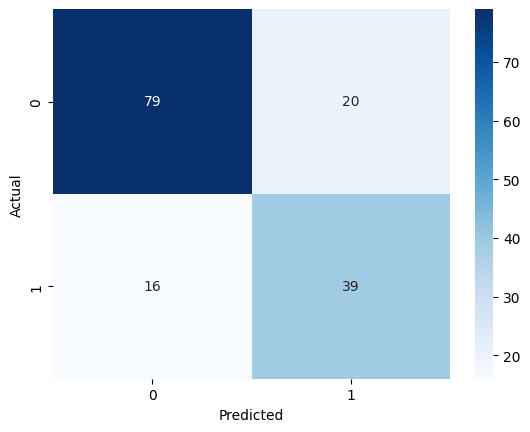

In [64]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

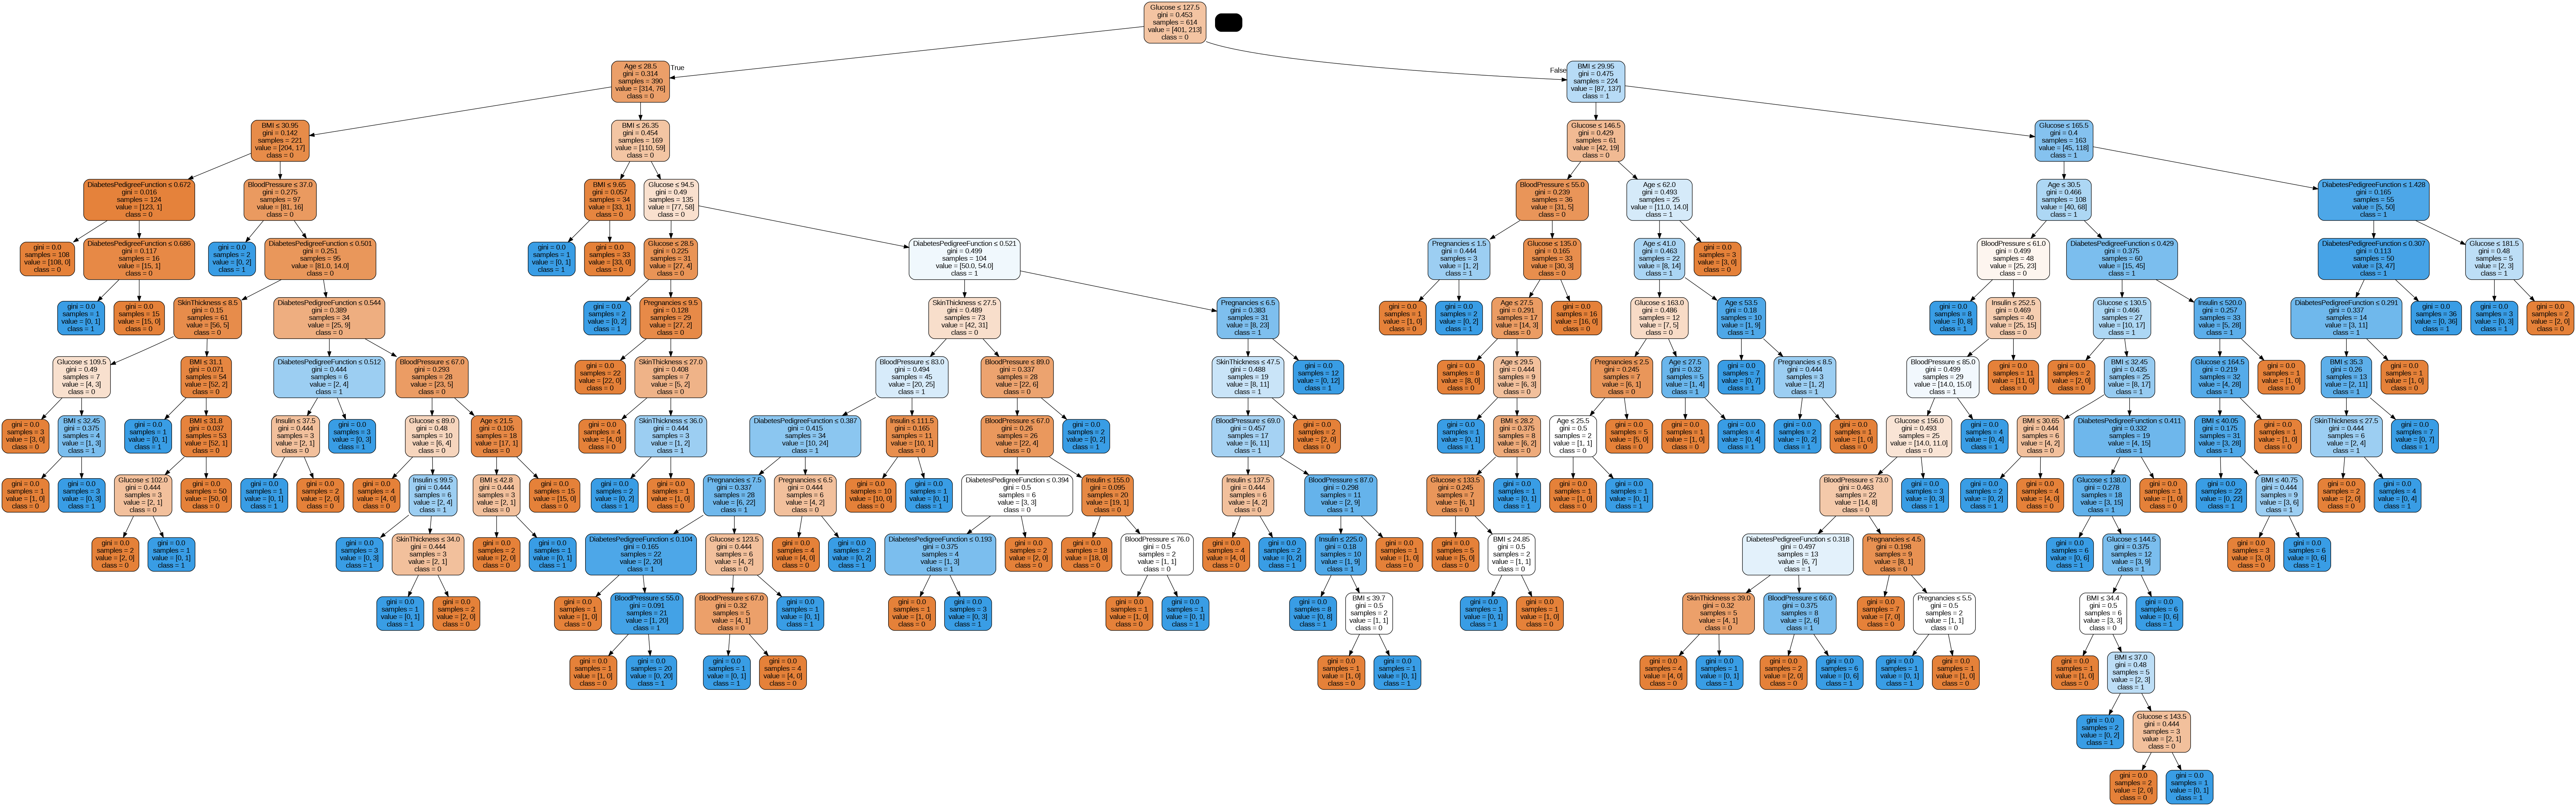

In [68]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

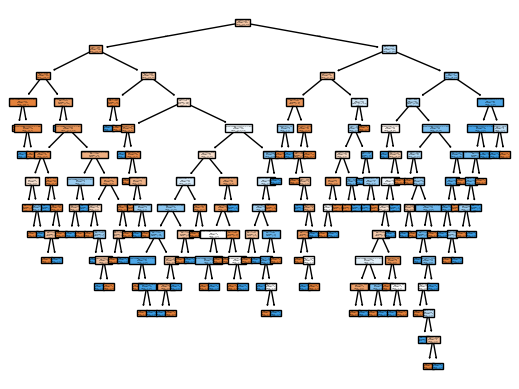

In [71]:
from sklearn import tree

plt.figure()
tree.plot_tree(model,
               filled=True,
               feature_names=X.columns,
               class_names=['0','1'])
plt.show()

### KNN

In [31]:
from sklearn.datasets import load_iris

iris = load_iris()

In [32]:
X = iris.data
y = iris.target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall Score (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 1.0
Precision Score (macro): 1.0
Recall Score (macro): 1.0
F1 Score (macro): 1.0


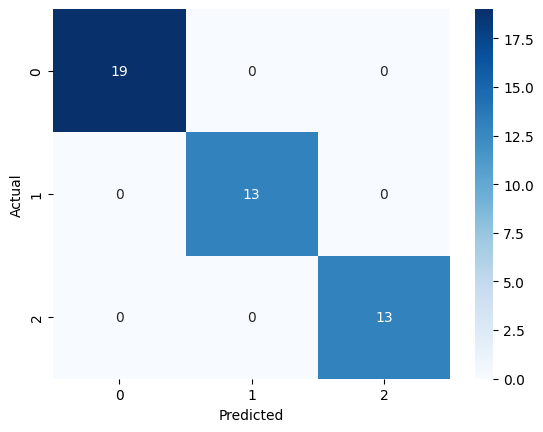

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### SVC

In [44]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [45]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [46]:
X = data.data
y = data.target

In [50]:
X.shape

(569, 30)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [52]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score (macro):", precision_score(y_test, y_pred))
print("Recall Score (macro):", recall_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred))

Accuracy Score: 0.9473684210526315
Precision Score (macro): 0.922077922077922
Recall Score (macro): 1.0
F1 Score (macro): 0.9594594594594594


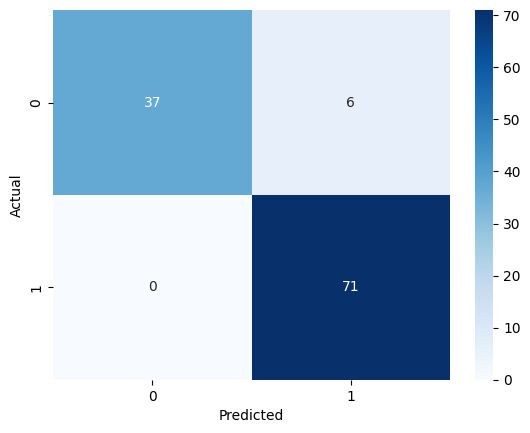

In [53]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Naive Bayes

In [72]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [75]:
df.drop("purpose", axis=1, inplace=True)

In [76]:
df.drop("not.fully.paid", axis=1, inplace=True)

In [77]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [79]:
df.shape

(9578, 12)

In [78]:
X = df.drop("credit.policy", axis=1)
y = df["credit.policy"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy Score: 0.8643006263048016
Precision Score: 0.875438596491228
Recall Score: 0.969559585492228
F1 Score: 0.9200983405039951


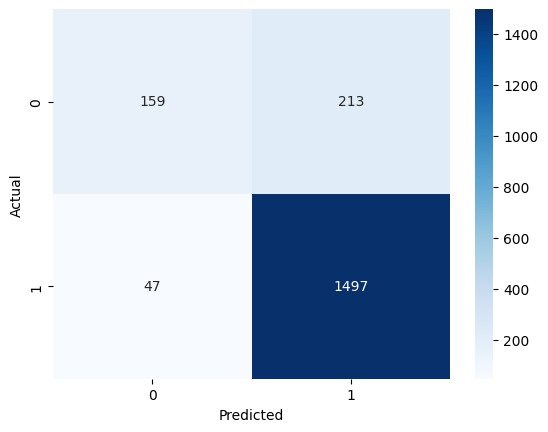

In [82]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()